# Car Prices

🎯 The goal of this challenge is to prepare a dataset and apply some feature selection techniques that you have learned so far.

🚗 We are dealing with a dataset about cars and we would like to predict whether a car is expensive or cheap.

In [2]:
# Data manipulation
import numpy as np
import pandas as pd
# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
# Checking whether a numerical feature has a normal distribution or not
from statsmodels.graphics.gofplots import qqplot
from sklearn.impute import SimpleImputer

In [3]:
url = "https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset.csv"

❓ Go ahead and load the CSV into a dataframe called `df`.

In [4]:
df = pd.read_csv(url)
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive


ℹ️ The description of the dataset is available [here](https://wagon-public-datasets.s3.amazonaws.com/Machine%20Learning%20Datasets/ML_Cars_dataset_description.txt). Make sure to refer to it throughout the exercise.

## (1) Duplicates

❓ Remove the duplicates from the dataset if there are any. ❓

*Overwite the dataframe `df`*

In [5]:
print(f"There are {df.duplicated().sum()} duplicated rows in this datasets, let's remove them...")

df = df.drop_duplicates().reset_index(drop=True)
print(f"After dropping them, there are {df.duplicated().sum()} duplicated rows in this datasets")

There are 14 duplicated rows in this datasets, let's remove them...
After dropping them, there are 0 duplicated rows in this datasets


## (2) Missing values

❓ Find the missing values and impute them either with `strategy = "most frequent"` (categorical variables) or `strategy = "median"` (numerical variables) ❓


In [11]:
round(df.isnull().sum().sort_values(ascending=False)/len(df),3) #NaN percentage for each column

enginelocation    0.052
carwidth          0.010
aspiration        0.000
curbweight        0.000
enginetype        0.000
cylindernumber    0.000
stroke            0.000
peakrpm           0.000
price             0.000
dtype: float64

In [8]:

# Instantiate a SimpleImputer object with your strategy of choice
imputer = SimpleImputer(strategy="most_frequent")

# Call the "fit" method on the object
imputer.fit(df[['enginelocation']])

# Call the "transform" method on the object
df['enginelocation'] = imputer.transform(df[['enginelocation']])

/var/folders/q0/927vzsz50hl8mmvk22_t7k280000gn/T/ipykernel_37463/1722908355.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['enginelocation'] = imputer.transform(df[['enginelocation']])


In [9]:
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
2,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
3,std,front,NaN,2337,ohc,four,3.40,5500,expensive
4,std,front,66.4,2824,ohc,five,3.40,5500,expensive
5,std,front,66.3,2507,ohc,five,3.40,5500,expensive


In [10]:
df.isnull().sum()

aspiration        0
enginelocation    0
carwidth          2
curbweight        0
enginetype        0
cylindernumber    0
stroke            0
peakrpm           0
price             0
dtype: int64

### `carwidth`

<details>
    <summary> 💡 <i>Hint</i> </summary>
    <br>
    ℹ️ <code>carwidth</code> has multiple representations for missing values. Some are <code>np.nans</code>, some are  <code>*</code>. Once located, they can be imputed by the median value, since missing values make up less than 30% of the data.
</details> 

In [12]:
#Check unique value in column
df.carwidth.value_counts(dropna=False)

66.5    22
63.8    19
65.4    15
63.6     9
68.4     9
64       9
64.4     9
65.5     8
65.2     7
65.6     6
64.2     6
66.3     6
67.2     6
66.9     5
67.9     5
*        4
68.9     4
71.7     3
70.3     3
65.7     3
63.9     3
64.8     3
65       2
67.7     2
68.3     2
71.4     2
NaN      2
66.6     1
63.4     1
72.3     1
64.1     1
68       1
72       1
70.5     1
66.1     1
70.6     1
69.6     1
61.8     1
66       1
64.6     1
60.3     1
70.9     1
66.4     1
68.8     1
Name: carwidth, dtype: int64

In [13]:
import numpy as np
from sklearn.impute import SimpleImputer

#Replace occurences of "*" by np.NaN
df = df.replace("*", np.nan)

carwidth_imputer = SimpleImputer(strategy="median") #Instantiate median imputer
carwidth_imputer.fit(df[['carwidth']])#fit imputer to carwidth column
df['carwidth'] = carwidth_imputer.transform(df[['carwidth']])

df.head()


,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
2,std,front,65.5,2337,ohc,four,3.40,5500,expensive
3,std,front,66.4,2824,ohc,five,3.40,5500,expensive
4,std,front,66.3,2507,ohc,five,3.40,5500,expensive


### `enginelocation`

<details>
    <summary>💡 <i>Hint</i> </summary>
    <br>
    ℹ️ Considering that <code>enginelocation</code> is a categorical feature, and that the vast majority of the category is <code>front</code>, impute with the most frequent.
</details>

In [15]:
# Unique values
print(df.enginelocation.unique())

['front' nan 'rear']


In [16]:
#Count each value
print(df.enginelocation.value_counts(dropna=False))

front    179
NaN       10
rear       2
Name: enginelocation, dtype: int64


🧪 **Test your code**

In [17]:
#Instantiate most frequent imputer
engine_imputer = SimpleImputer(strategy="most_frequent")
#Fit imputer to enginelocation column
engine_imputer.fit(df[['enginelocation']])
#Impute
df['enginelocation'] = engine_imputer.transform(df[['enginelocation']])

df.head()


,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,64.1,2548,dohc,four,2.68,5000,expensive
1,std,front,65.5,2823,ohcv,six,3.47,5000,expensive
2,std,front,65.5,2337,ohc,four,3.40,5500,expensive
3,std,front,66.4,2824,ohc,five,3.40,5500,expensive
4,std,front,66.3,2507,ohc,five,3.40,5500,expensive


In [18]:
from nbresult import ChallengeResult

result = ChallengeResult('missing_values',
                         dataset = df)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/orchidaung/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/orchidaung/code/NwayEi/data-car-prices/tests
plugins: asyncio-0.19.0, cov-4.0.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 2 items

test_missing_values.py::TestMissing_values::test_carwidth PASSED         [ 50%]
test_missing_values.py::TestMissing_values::test_engine_location PASSED  [100%]

============================== 2 passed in 0.26s ===============================


💯 You can commit your code:

git add tests/missing_values.pickle

git commit -m 'Completed missing_values step'

git push origin master



## (3) Scaling the numerical features

In [19]:
# As a reminder, some information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   aspiration      191 non-null    object 
 1   enginelocation  191 non-null    object 
 2   carwidth        191 non-null    float64
 3   curbweight      191 non-null    int64  
 4   enginetype      191 non-null    object 
 5   cylindernumber  191 non-null    object 
 6   stroke          191 non-null    float64
 7   peakrpm         191 non-null    int64  
 8   price           191 non-null    object 
dtypes: float64(2), int64(2), object(5)
memory usage: 13.6+ KB


In [20]:
# And here are the numerical features of the dataset we need to scale
numerical_features = df.select_dtypes(exclude=['object']).columns
numerical_features

Index(['carwidth', 'curbweight', 'stroke', 'peakrpm'], dtype='object')

❓ **Question: Scaling the numerical features** ❓

Investigate the numerical features for outliers and distribution, and apply the solutions below accordingly:
- Robust Scaler
- Standard Scaler

Replace the original columns with the transformed values.

### `peakrpm` , `carwidth` , & `stroke`

<details>
    <summary>💡 <i>Hint</i> </summary>

    
ℹ️ <code>peakrpm</code>, <code>carwidth</code>, & <code>stroke</code> have normal distributions but also some outliers. Hence, it is advisable to use `RobustScaler()`.
</details>

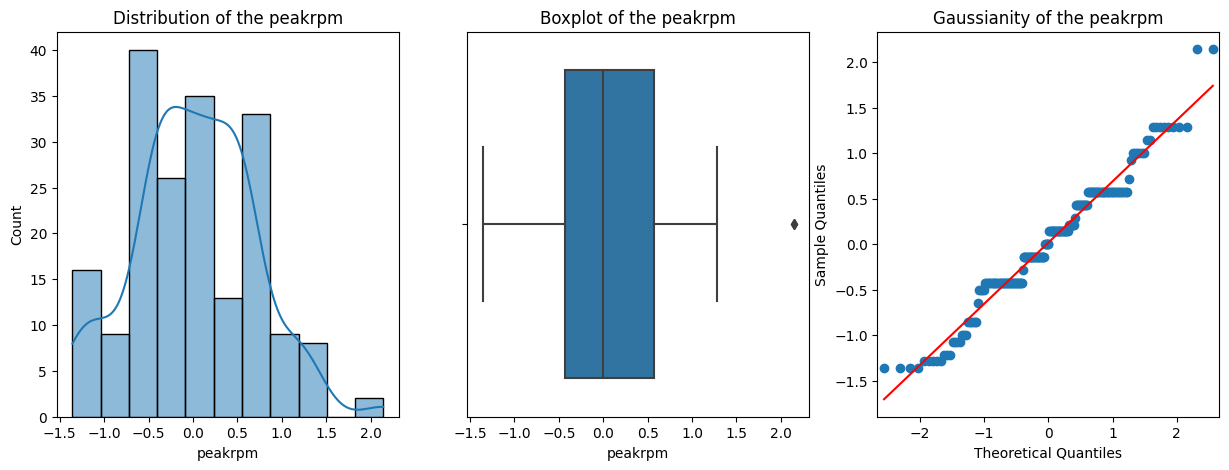

In [25]:
#It's cruical to understand the overal distrubtion, the potential outliers...
#and also the Gaussiantiy with QQplot....before Scaling!

variable = 'peakrpm'

fig,ax = plt.subplots(1,3,figsize=(15,5))

ax[0].set_title(f"Distribution of the {variable}")
sns.histplot(data = df, x =f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot of the {variable}")
sns.boxplot(data = df, x = f"{variable}", ax = ax[1])

ax[2].set_title(f"Gaussianity of the {variable}")
qqplot(df[f"{variable}"], line='s', ax = ax[2]);

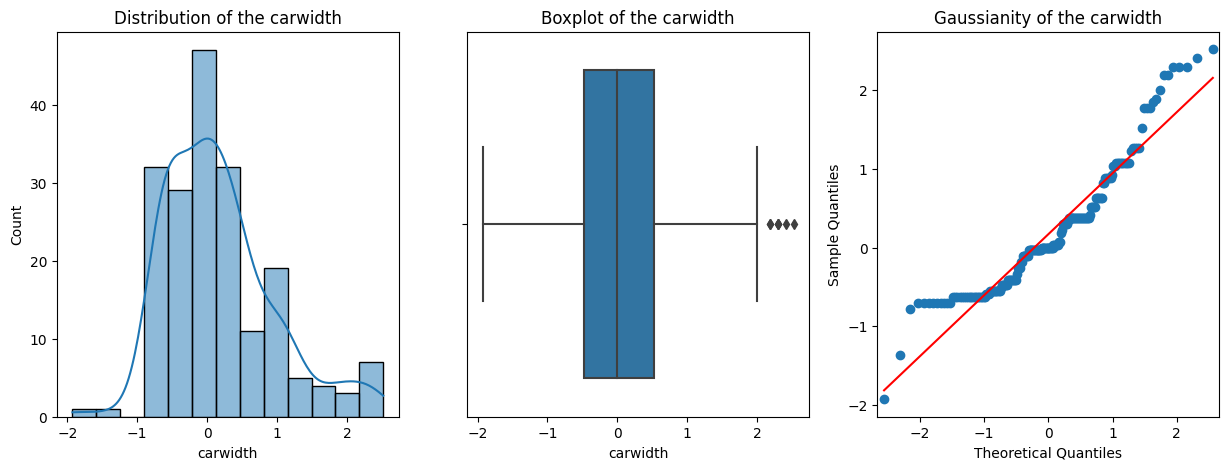

In [26]:
#It's cruical to understand the overal distrubtion, the potential outliers...
#and also the Gaussiantiy with QQplot....before Scaling!

variable = 'carwidth'

fig,ax = plt.subplots(1,3,figsize=(15,5))

ax[0].set_title(f"Distribution of the {variable}")
sns.histplot(data = df, x =f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot of the {variable}")
sns.boxplot(data = df, x = f"{variable}", ax = ax[1])

ax[2].set_title(f"Gaussianity of the {variable}")
qqplot(df[f"{variable}"], line='s', ax = ax[2]);

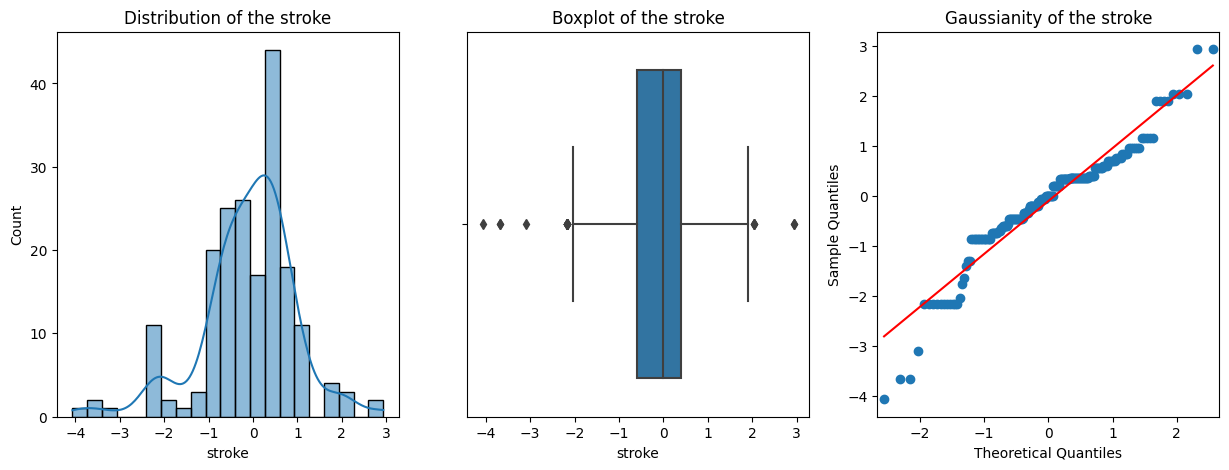

In [27]:
#It's cruical to understand the overal distrubtion, the potential outliers...
#and also the Gaussiantiy with QQplot....before Scaling!

variable = 'stroke'

fig,ax = plt.subplots(1,3,figsize=(15,5))

ax[0].set_title(f"Distribution of the {variable}")
sns.histplot(data = df, x =f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot of the {variable}")
sns.boxplot(data = df, x = f"{variable}", ax = ax[1])

ax[2].set_title(f"Gaussianity of the {variable}")
qqplot(df[f"{variable}"], line='s', ax = ax[2]);

In [29]:
from sklearn.preprocessing import RobustScaler

# Step 0 - Instanciate Robust Scaler
rb_scaler = RobustScaler()

# Step 1- Fit the scaler to the `GrLiveArea`
# to "learn" the median value and the IQR
rb_scaler.fit(df[['peakrpm','carwidth','stroke']])

# 2-Scale/Transform
# <-> apply the transformation (value - median) / IQR for every house

df['peakrpm'],df['carwidth'],df['stroke'] = rb_scaler.transform(df[['peakrpm','carwidth','stroke']]).T
df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,2548,dohc,four,-2.033333,-0.142857,expensive
1,std,front,0.000000,2823,ohcv,six,0.600000,-0.142857,expensive
2,std,front,0.000000,2337,ohc,four,0.366667,0.571429,expensive
3,std,front,0.333333,2824,ohc,five,0.366667,0.571429,expensive
4,std,front,0.296296,2507,ohc,five,0.366667,0.571429,expensive


### `curbweight`

<details>
    <summary>💡 <i>Hint</i> </summary>
    <br>
    ℹ️ <code>curbweight</code> has a normal distribution and no outliers. It can be Standard Scaled.
</details>

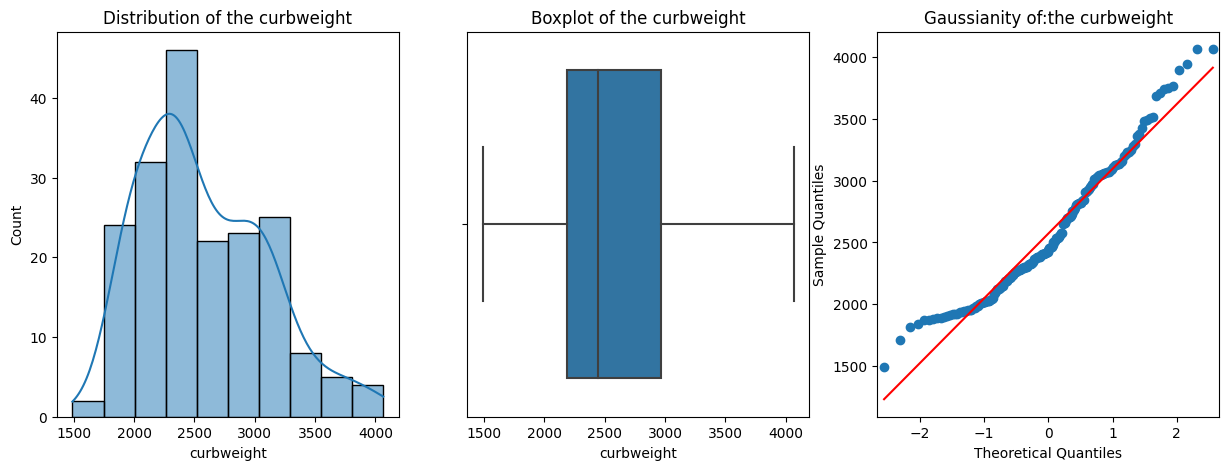

In [30]:
# It is crucial to to understand the overall distribution, the potential outliers...
# and also the Gaussianity with QQplot... before Scaling!

variable = 'curbweight'

fig, ax = plt.subplots(1,3,figsize=(15,5))

ax[0].set_title(f"Distribution of the {variable}")
sns.histplot(data = df, x = f"{variable}", kde=True, ax = ax[0])

ax[1].set_title(f"Boxplot of the {variable}")
sns.boxplot(data = df, x = f"{variable}", ax=ax[1])

ax[2].set_title(f"Gaussianity of:the {variable}")
qqplot(df[f"{variable}"],line='s',ax=ax[2]);

In [31]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()

standard_scaler.fit(df[['curbweight']])
df['curbweight'] = standard_scaler.transform(df[['curbweight']])

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,std,front,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
1,std,front,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
2,std,front,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
3,std,front,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
4,std,front,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive


🧪 **Test your code**

In [32]:
from nbresult import ChallengeResult

result = ChallengeResult('scaling',
                         dataset = df
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/orchidaung/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/orchidaung/code/NwayEi/data-car-prices/tests
plugins: asyncio-0.19.0, cov-4.0.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 4 items

test_scaling.py::TestScaling::test_carwidth PASSED                       [ 25%]
test_scaling.py::TestScaling::test_curbweight PASSED                     [ 50%]
test_scaling.py::TestScaling::test_peakrpm PASSED                        [ 75%]
test_scaling.py::TestScaling::test_stroke PASSED                         [100%]

============================== 4 passed in 0.27s ===============================


💯 You can commit your code:

git add tests/scaling.pickle

git commit -m 'Completed scaling step'

git push origin master



## (4) Encoding the categorical features

❓ **Question: encoding the categorical variables** ❓

👇 Investigate the features that require encoding, and apply the following techniques accordingly:

- One-hot encoding
- Manual ordinal encoding

In the Dataframe, replace the original features with their encoded version(s).

### `aspiration` & `enginelocation`

<details>
    <summary>💡 <i>Hint</i> </summary>
    <br>
    ℹ️ <code>aspiration</code> and <code>enginelocation</code> are binary categorical features.
</details>

In [34]:
#check the unique values of 'aspiration'
print(f"The unique values of 'aspiration' are {df.aspiration.unique()}")

#check the unique value of 'enginelocation'
print(f"The unique value of 'enginelocation' are {df.enginelocation.unique()}")

The unique values of 'aspiration' are ['std' 'turbo']
The unique value of 'enginelocation' are ['front' 'rear']


In [41]:
from sklearn.preprocessing import OneHotEncoder

binary_encoder = OneHotEncoder(sparse_output= False, drop='if_binary')
df['aspiration'], df['enginelocation'] = binary_encoder.fit_transform(df[['aspiration','enginelocation']]).T

df.head()

,aspiration,enginelocation,carwidth,curbweight,enginetype,cylindernumber,stroke,peakrpm,price
0,0.0,0.0,-0.518519,-0.048068,dohc,four,-2.033333,-0.142857,expensive
1,0.0,0.0,0.000000,0.476395,ohcv,six,0.600000,-0.142857,expensive
2,0.0,0.0,0.000000,-0.450474,ohc,four,0.366667,0.571429,expensive
3,0.0,0.0,0.333333,0.478302,ohc,five,0.366667,0.571429,expensive
4,0.0,0.0,0.296296,-0.126260,ohc,five,0.366667,0.571429,expensive


In [43]:
#check the unique values of 'aspiration' after onehotencoder
print(f"The unique values of 'aspiration' are {df.aspiration.unique()}")

#check the unique value of 'enginelocation' after onehotencoder
print(f"The unique value of 'enginelocation' are {df.enginelocation.unique()}")

The unique values of 'aspiration' are [0. 1.]
The unique value of 'enginelocation' are [0. 1.]


### `enginetype`

<details>
    <summary>💡 <i>Hint</i> </summary>
    <br>
    ℹ️ <code>enginetype</code> is a multicategorical feature and must be One hot encoded.
</details>

In [44]:
#check the unique values of 'enginetype'
print(f"The unique values of 'enginetype' are {df.enginetype.unique()}")

The unique values of 'enginetype' are ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


In [45]:
df.shape

(191, 9)

In [48]:
from sklearn.preprocessing import OneHotEncoder

# Check unique values for streets (3)
print(f"The unique values for 'engines' are {df.enginetype.unique()}")

# Instantiate the OneHotEncoder
ohe = OneHotEncoder(sparse_output= False)

#Fitting it
ohe.fit(df[['enginetype']])

# Showing the categories detected by the encoder
display(ohe.categories_)

# Since Sklearn 1.1, we can retrieve the names of the generated columns
display(ohe.get_feature_names_out())

# Let's encode EngineType
enginetype_encoded = ohe.transform(df[['enginetype']])

# Now we store the encoded values in the dataframe
df[ohe.get_feature_names_out()] = enginetype_encoded

# We can get rid of the original column EngineType now
df.drop(columns='enginetype', inplace = True)

# And show df
df

The unique values for 'engines' are ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']


[array(['dohc', 'dohcv', 'l', 'ohc', 'ohcf', 'ohcv', 'rotor'], dtype=object)]

array(['enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor'], dtype=object)

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,0.0,-0.518519,-0.048068,four,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.476395,six,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.000000,-0.450474,four,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.333333,0.478302,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.296296,-0.126260,five,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,0.0,0.0,1.259259,0.722416,four,-0.466667,0.428571,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
187,1.0,0.0,1.222222,0.907408,four,-0.466667,0.285714,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
188,0.0,0.0,1.259259,0.836844,six,-1.400000,0.571429,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
189,1.0,0.0,1.259259,1.227807,six,0.366667,-0.428571,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### `cylindernumber`

<details>
    <summary>💡 Hint </summary>

ℹ️ <code>cylindernumber</code> is an ordinal feature and must be manually encoded into numeric.

</details>

In [49]:
#check the unique values of 'clyindernumber'
print(f"The unique values of 'clyindernumber' are {df.cylindernumber.unique()}")

The unique values of 'clyindernumber' are ['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']


In [51]:
df['cylindernumber'] = df['cylindernumber'].map({'four': 4,
                                                 'six': 6,
                                                 'five': 5,
                                                 'three':3,
                                                 'twelve':12,
                                                 'two':2,
                                                 'eight':8})

df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,0.0,-0.518519,-0.048068,4,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.476395,6,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.000000,-0.450474,4,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.333333,0.478302,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.296296,-0.126260,5,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


❓ Now that you've made `cylindernumber` into a numeric feature between 2 and 12, you need to scale it ❓

<br/>

<details>
    <summary>💡 Hint </summary>

Look at the current distribution of the `cylindernumber` and ask yourself the following questions:
- Does scaling affect a feature's distribution ?
- According to the distribution of this feature, what is the most appropriate scaling method?
</details>

In [52]:
df['cylindernumber'].value_counts()

4     147
6      23
5      11
8       5
2       3
3       1
12      1
Name: cylindernumber, dtype: int64

(array([5., 1., 0., 0., 0., 0., 0., 0., 0., 1.]),
 array([  1. ,  15.6,  30.2,  44.8,  59.4,  74. ,  88.6, 103.2, 117.8,
        132.4, 147. ]),
 <BarContainer object of 10 artists>)

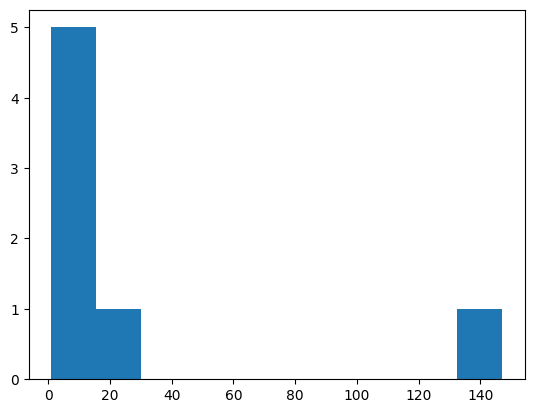

In [55]:
#Same but visualized through a histogram
import matplotlib.pyplot as plt
plt.hist(df['cylindernumber'].value_counts())

In [56]:
#Clearly not a Guasssian distribution so no Standard Scaler
#So which one between MinMax and Robust? Let's try the two of them

from sklearn.preprocessing import MinMaxScaler, RobustScaler

mm_scaler = MinMaxScaler()
mm = pd.DataFrame(mm_scaler.fit_transform(df[['cylindernumber']]))

rb_scaler = RobustScaler()
rb = pd.DataFrame(rb_scaler.fit_transform(df[['cylindernumber']]))

<details>
    <summary><i>Here is a screenshot of how your dataframe shoud look like after scaling and encoding</i></summary>
    
    
<img src="https://wagon-public-datasets.s3.amazonaws.com/05-Machine-Learning/02-Prepare-the-dataset/car_price_after_scaling_and_encoding.png">    

</details>

In [61]:
mm.value_counts()


0.2    147
0.4     23
0.3     11
0.6      5
0.0      3
0.1      1
1.0      1
dtype: int64

In [60]:
rb.value_counts()


 0.0    147
 2.0     23
 1.0     11
 4.0      5
-2.0      3
-1.0      1
 8.0      1
dtype: int64

In [62]:
#Robust is better suited as it will "penalize"
#the least and most powerful cars

from sklearn.preprocessing import RobustScaler

rb_scaler = RobustScaler()

df['cylindernumber'] = rb_scaler.fit_transform(df[['cylindernumber']])

df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,0.0,-0.518519,-0.048068,0.0,-2.033333,-0.142857,expensive,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.476395,2.0,0.600000,-0.142857,expensive,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.000000,-0.450474,0.0,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.333333,0.478302,1.0,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.296296,-0.126260,1.0,0.366667,0.571429,expensive,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### `price`

👇 Encode the target `price`.

<details>
    <summary>💡 Hint </summary>
    <br>
    ℹ️ <code>price</code> is the target and must be Label encoded.
</details>

In [63]:
from sklearn.preprocessing import LabelEncoder

df['price'] = LabelEncoder().fit_transform(df['price'])
df.head()

,aspiration,enginelocation,carwidth,curbweight,cylindernumber,stroke,peakrpm,price,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor
0,0.0,0.0,-0.518519,-0.048068,0.0,-2.033333,-0.142857,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.000000,0.476395,2.0,0.600000,-0.142857,1,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.000000,-0.450474,0.0,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.333333,0.478302,1.0,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.296296,-0.126260,1.0,0.366667,0.571429,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0


🧪 **Test your code**

In [64]:
from nbresult import ChallengeResult

result = ChallengeResult('encoding',
                         dataset = df)
result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/orchidaung/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/orchidaung/code/NwayEi/data-car-prices/tests
plugins: asyncio-0.19.0, cov-4.0.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 4 items

test_encoding.py::TestEncoding::test_aspiration PASSED                   [ 25%]
test_encoding.py::TestEncoding::test_enginelocation PASSED               [ 50%]
test_encoding.py::TestEncoding::test_enginetype PASSED                   [ 75%]
test_encoding.py::TestEncoding::test_price PASSED                        [100%]

============================== 4 passed in 0.26s ===============================


💯 You can commit your code:

git add tests/encoding.pickle

git commit -m 'Completed encoding step'

git push origin master



## (5) Base Modelling

👏 The dataset has been preprocessed and is now ready to be fitted to a model. 

❓**Question: a first attempt to evaluate a classification model** ❓

Cross-validate a `LogisticRegression` on this preprocessed dataset and save its score under a variable named `base_model_score`.

In [66]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

X = df.drop(columns=['price'])
y = df['price']

model = LogisticRegression()

scores = cross_val_score(model, X, y, cv= 10)
base_model_score = scores.mean()

base_model_score

0.8797368421052632

🧪 **Test your code**

In [67]:
from nbresult import ChallengeResult

result = ChallengeResult('base_model',
                         score = base_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/orchidaung/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/orchidaung/code/NwayEi/data-car-prices/tests
plugins: asyncio-0.19.0, cov-4.0.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_base_model.py::TestBase_model::test_base_model_score PASSED         [100%]

============================== 1 passed in 0.06s ===============================


💯 You can commit your code:

git add tests/base_model.pickle

git commit -m 'Completed base_model step'

git push origin master



## (6) Feature Selection (with _Permutation Importance_)

👩🏻‍🏫 A powerful way to detect whether a feature is relevant or not to predict a target is to:
1. Run a model and score it
2. Shuffle this feature, re-run the model and score it
    - If the performance significantly dropped, the feature is important and you shoudn't have dropped it
    - If the performance didn't decrease a lot, the feature may be discarded.

❓ **Questions** ❓

1. Perform a feature permutation to detect which features bring the least amount of information to the model. 
2. Remove the weak features from your dataset until you notice model performance dropping substantially
3. Using your new set of strong features, cross-validate a new model, and save its score under variable name `strong_model_score`.

In [68]:
import numpy as np
from sklearn.model_selection import cross_validate
from sklearn.inspection import permutation_importance


# Evaluate your model without feature permutation
model = LogisticRegression()
cv_results = cross_validate(model, X, y, cv = 5)
score = cv_results["test_score"].mean()
print(f"Before any feature permutation, the cross-validated accuracy is equal to {round(score,2)}")


## Question 1 - Permutation importance
# Fit the model
model = LogisticRegression().fit(X,y)

# Perform Permutation
permutation_score = permutation_importance(model, X, y, n_repeats=100)

importance_df = pd.DataFrame(np.vstack((X.columns,
                                        permutation_score.importances_mean)).T, # Unstack results
                            columns = ['feature','feature_importance'])

print("After feature permutation, here are the decreases in terms of scores:")
# Order by importance
importance_df = importance_df.sort_values(by="feature_importance", ascending = False)
importance_df


Before any feature permutation, the cross-validated accuracy is equal to 0.84
After feature permutation, here are the decreases in terms of scores:


,feature,feature_importance
3,curbweight,0.285969
2,carwidth,0.104241
5,stroke,0.030105
11,enginetype_ohcf,0.018272
10,enginetype_ohc,0.014555
6,peakrpm,0.013927
13,enginetype_rotor,0.011309
4,cylindernumber,0.008377
0,aspiration,0.007801
7,enginetype_dohc,0.005236


In [69]:
## Question 2 - remove weak features

# I want to get rid of features which caused less than this  in terms of performance
threshold = 0.05

# Decompose this one-liner piece of code step by step if you don't understand it at first sight!
weak_features = importance_df[importance_df.feature_importance <= threshold]["feature"].values
weak_features

array(['stroke', 'enginetype_ohcf', 'enginetype_ohc', 'peakrpm',
       'enginetype_rotor', 'cylindernumber', 'aspiration',
       'enginetype_dohc', 'enginetype_ohcv', 'enginelocation',
       'enginetype_dohcv', 'enginetype_l'], dtype=object)

In [73]:
## Question 3 - Cross validating the model with strong features only
X_strong_features = df.drop(columns=list(weak_features) + ["price"])
print(f"Our strong features are {list(X_strong_features.columns)}")

model = LogisticRegression()

scores = cross_val_score(model, X_strong_features, y, cv = 5)
strong_model_score = scores.mean()

print(f"Before removing weak features, the cross-validated accuracy was equal to {round(score,2)}")

print(f"The LogisticRegression fitted with the strong features only has a score of {round(strong_model_score,2)}")

#### NOTE - The score may even be better because
### some features were bringing nothing else than noise to the model

Our strong features are ['carwidth', 'curbweight']
Before removing weak features, the cross-validated accuracy was equal to 0.84
The LogisticRegression fitted with the strong features only has a score of 0.91


🧪 **Test your code**

In [74]:
from nbresult import ChallengeResult

result = ChallengeResult('strong_model',
                         score = strong_model_score
)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/orchidaung/.pyenv/versions/3.10.6/envs/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/orchidaung/code/NwayEi/data-car-prices/tests
plugins: asyncio-0.19.0, cov-4.0.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_strong_model.py::TestStrong_model::test_strong_model_score PASSED   [100%]

============================== 1 passed in 0.06s ===============================


💯 You can commit your code:

git add tests/strong_model.pickle

git commit -m 'Completed strong_model step'

git push origin master



## Bonus - Stratifying your data ⚖️

💡 As we split our data into training and testing, we need to be mindful of the proportion of categorical variables in our dataset - whether it's the classes of our target `y` or a categorical feature in `X`.

Let's have a look at an example 👇

❓ Split your original `X` and `y` into training and testing data, using sklearn's `train_test_split`; use `random_state=1` and `test_size=0.3` to have comparable results.

In [76]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

❓ Check the proportion of `price` class `1` cars in your training dataset and testing dataset.

> _If you check the proportion of them in the raw `df`, it should be very close to 50/50_

In [78]:
print(f"Training data share of class 1 cars:", y_train.mean())
print(f"Testing data share of class 1 cars:", y_test.mean())

Training data share of class 1 cars: 0.5037593984962406
Testing data share of class 1 cars: 0.5172413793103449


It should still be pretty close to 50/50 ☝️ 

***But what if we change the random state?*** 

❓ Loop through random states 1 through 10, each time calculating the share of `price` class `1` cars in the training and testing data. ❓

In [79]:
for i in range(1, 11):
    print("-"*50)
    print("##### Random state set =", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i)
    print('Training data share of class 1 cars:', round(y_train.mean(), 3))
    print('Testing data share of class 1 cars:', round(y_test.mean(), 3))

--------------------------------------------------
##### Random state set = 1
Training data share of class 1 cars: 0.504
Testing data share of class 1 cars: 0.517
--------------------------------------------------
##### Random state set = 2
Training data share of class 1 cars: 0.481
Testing data share of class 1 cars: 0.569
--------------------------------------------------
##### Random state set = 3
Training data share of class 1 cars: 0.504
Testing data share of class 1 cars: 0.517
--------------------------------------------------
##### Random state set = 4
Training data share of class 1 cars: 0.534
Testing data share of class 1 cars: 0.448
--------------------------------------------------
##### Random state set = 5
Training data share of class 1 cars: 0.534
Testing data share of class 1 cars: 0.448
--------------------------------------------------
##### Random state set = 6
Training data share of class 1 cars: 0.496
Testing data share of class 1 cars: 0.534
----------------------

You will observe that the proportion changes every time, sometimes even quite drastically 😱! This can affect model performance!

❓ Compare the test score of a logistic regression when trained using `train_test_split(random_state=1)` _vs._ `random_state=9` ❓ 

Remember to fit on training data and score on testing data.

In [80]:
model_1 = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model_1.fit(X_train, y_train)

model_1.score(X_test, y_test)

0.9310344827586207

In [81]:
model_9 = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)

model_9.fit(X_train, y_train)

model_9.score(X_test, y_test)

0.7931034482758621

👀 You should see a much lower score with `random_state=9` because the proportion of class `1` cars in that test set is 34.5%, quite far from the 57.9% in the training set or even the 50% in the original dataset.

This is substantial, as this accidental imbalance in our dataset can not only make model performance worse, but also distort the "reality" during training or scoring 🧐

***So how do we fix this issue? How do we keep the same distribution of classes across the train set and the test set? 🔧***

🎁 Luckily, this is taken care of by `cross_validate` in sklearn, when the estimator (a.k.a the model) is a classifier and the target is a class. Check out the documentation of the `cv` parameter in 📚 [**sklearn.model_selection.cross_validate**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html).

The answer is to use the following:

>📚 [**Stratification**](https://scikit-learn.org/stable/modules/cross_validation.html#stratification)

### Stratification of the target

💡 We can also use the ***strafification*** technique in a `train_test_split`.

❓ Run through the same 1 to 10 random state loop again, but this time also ***pass `stratify=y` into the holdout method***. ❓

In [82]:
for i in range(1, 11):
    print("-"*50)
    print("##### Random state set =", i)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=i, stratify=y)
    print('Training data share of class 1 cars:', round(y_train.mean(), 3))
    print('Testing data share of class 1 cars:', round(y_test.mean(), 3))

--------------------------------------------------
##### Random state set = 1
Training data share of class 1 cars: 0.511
Testing data share of class 1 cars: 0.5
--------------------------------------------------
##### Random state set = 2
Training data share of class 1 cars: 0.511
Testing data share of class 1 cars: 0.5
--------------------------------------------------
##### Random state set = 3
Training data share of class 1 cars: 0.511
Testing data share of class 1 cars: 0.5
--------------------------------------------------
##### Random state set = 4
Training data share of class 1 cars: 0.511
Testing data share of class 1 cars: 0.5
--------------------------------------------------
##### Random state set = 5
Training data share of class 1 cars: 0.511
Testing data share of class 1 cars: 0.5
--------------------------------------------------
##### Random state set = 6
Training data share of class 1 cars: 0.511
Testing data share of class 1 cars: 0.5
----------------------------------

👀 Even if the random state is changing, the proportion of classes inside the training and testing data is kept the same as in the original `y`. This is what _stratification_ is.

Using `train_test_split` with the `stratify` parameter, we can also preserve proportions of a feature across training and testing data. This can be extremely important, for example:

- preserving proportion of male and female customers in predicting churn 🙋‍♂️ 🙋
- preserving the proportion big and small houses in predicting their prices 🏠 🏰
- preserving distribution of 1-5 review scores (multiclass!) in recommending the next product 🛍️
- etc...

For instance, in our dataset, to holdout the same share of `aspiration` feature in both training and testing data, we could simply write `train_test_split(X, y, test_size=0.3, stratify=X.aspiration)`

---

As we saw, **`cross_validate` [can automatically stratify the target](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#:~:text=For%20int/None%20inputs%2C%20if%20the%20estimator%20is%20a%20classifier%20and%20y%20is%20either%20binary%20or%20multiclass%2C%20StratifiedKFold%20is%20used.), but not the features...** 🤔 We need a bit of extra work for that.

We need `StratifiedKFold` 🔬



### Stratification - generalized

📚 [**StratifiedKFold**](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html) allows us to split the data into `K` splits, while stratifying on certain columns (features or target).

This way, we can do a manual cross-validation while keeping proportions on the categorical features of interest - let's try it with the binary `aspiration` feature:

In [83]:
from sklearn.model_selection import StratifiedKFold

# initializing a stratified k-fold that will split the data into 5 folds
skf = StratifiedKFold(n_splits=5)
scores = []

# .split() method creates an iterator; 'X.aspiration' is the feature that we stratify by
for train_indices, test_indices in skf.split(X, X.aspiration):

    # 'train_indices' and 'test_indices' are lists of indices that produce proportional splits
    X_train, X_test = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_test = y.iloc[train_indices], y.iloc[test_indices]

    # initialize and fit a model
    model = LogisticRegression()
    model.fit(X_train, y_train)

    # append a score to get an average of 5 folds in the end
    scores.append(model.score(X_test, y_test))

np.array(scores).mean()

0.8585695006747638

📖 Some sklearn reads on **stratification**:

- [Visualization of how different holdout methods in sklearn work](https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py)
- [Overall cross-validation and stratification understanding](https://scikit-learn.org/stable/modules/cross_validation.html#stratification)

🏁 Congratulations! You have prepared a whole dataset, ran feature selection and even learned about stratification 💪

💾 Don't forget to git add/commit/push your notebook...

🚀 ... and move on to the next challenge!